<a href="https://colab.research.google.com/github/PranavPutsa1006/Data-Science/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA: Auto Regressive Integrated Moving Averages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("perrin-freres-monthly-champagne.csv")

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
##cleaning up the data
df.columns=["month","sales"]
df.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
##drop last two rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,month,sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:

df.drop(105,axis=0,inplace=True)


In [ ]:
df.tail()

,month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
##convert month into Datetime
df['month']=pd.to_datetime(df['month'])

In [ ]:
df.head()

,month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('month',inplace=True)
df.head()

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Visualization

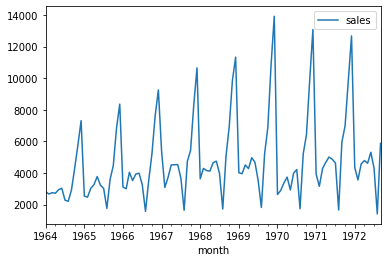

In [ ]:
df.plot()

In [ ]:
##testing for stationarity
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df['sales'])

In [ ]:
#H0: It is not stationary
#H1: It is stationary

def adfuller_test(sales):
  result=adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#lags used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )
  if result[1] <= 0.05:
    print("strong evidence")
  else:
    print("weak evidence")

In [ ]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#lags used : 11
Number of Observations Used : 93
weak evidence


Differencing

In [ ]:
df['sales']

month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: sales, Length: 105, dtype: float64

In [ ]:
df['sales first difference'] = df['sales'] - df['sales'].shift(1)

In [ ]:
df

,sales,sales first difference
month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [ ]:
df['sales'].shift(1)

month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [ ]:
df['seasonal first difference'] = df['sales'] - df['sales'].shift(12)

In [ ]:
df.head(14)

,sales,seasonal first difference
month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [ ]:
## again test dickey_fuller test
adfuller_test(df['seasonal first difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#lags used : 0
Number of Observations Used : 92
strong evidence


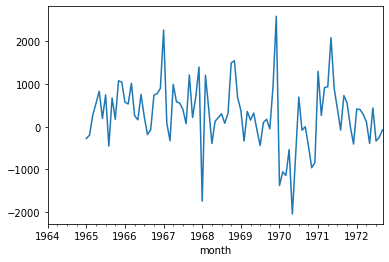

In [ ]:
df['seasonal first difference'].plot()

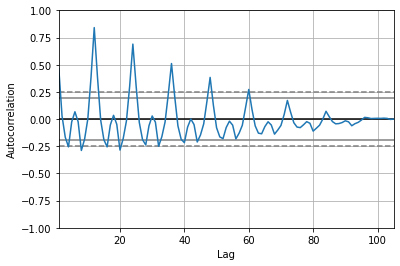

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()